In [90]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
%matplotlib inline

In [92]:
df=pd.read_csv('train.csv/train.csv')

In [3]:
#testing
df=pd.read_csv('test.csv/test.csv')

In [48]:
df.columns

Index(['id', 'CustomerGender', 'CustomerType', 'Age', 'TravelPurpose',
       'ClassTravelled', 'DistanceToDestination', 'Inflight wifi',
       'Time convenience', 'WebsiteExperience', 'ConvenienceOfGate',
       'Inflight Food', 'Online check-in', 'ComfortOfSeats',
       'Inflight entertainment system', 'On-board service',
       'Leg room in flight', 'Baggage handling ease', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'CustomerHappiness'],
      dtype='object')

In [ ]:
df.info()

## Fixing missing values

Can consider distance

<AxesSubplot: >

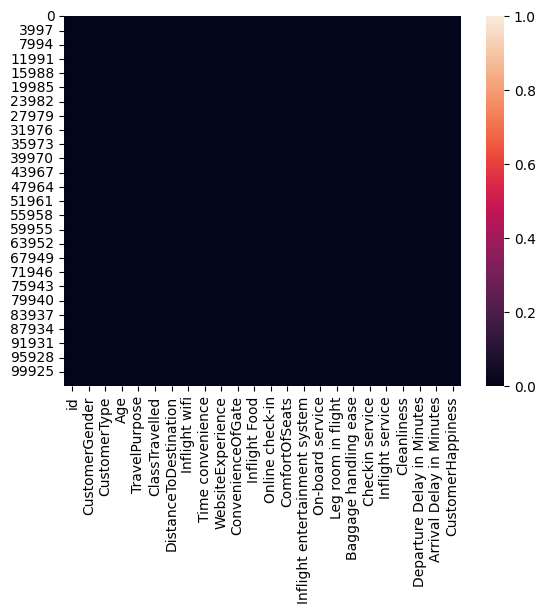

In [23]:
sns.heatmap(df.isnull())

In [82]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

<AxesSubplot: >

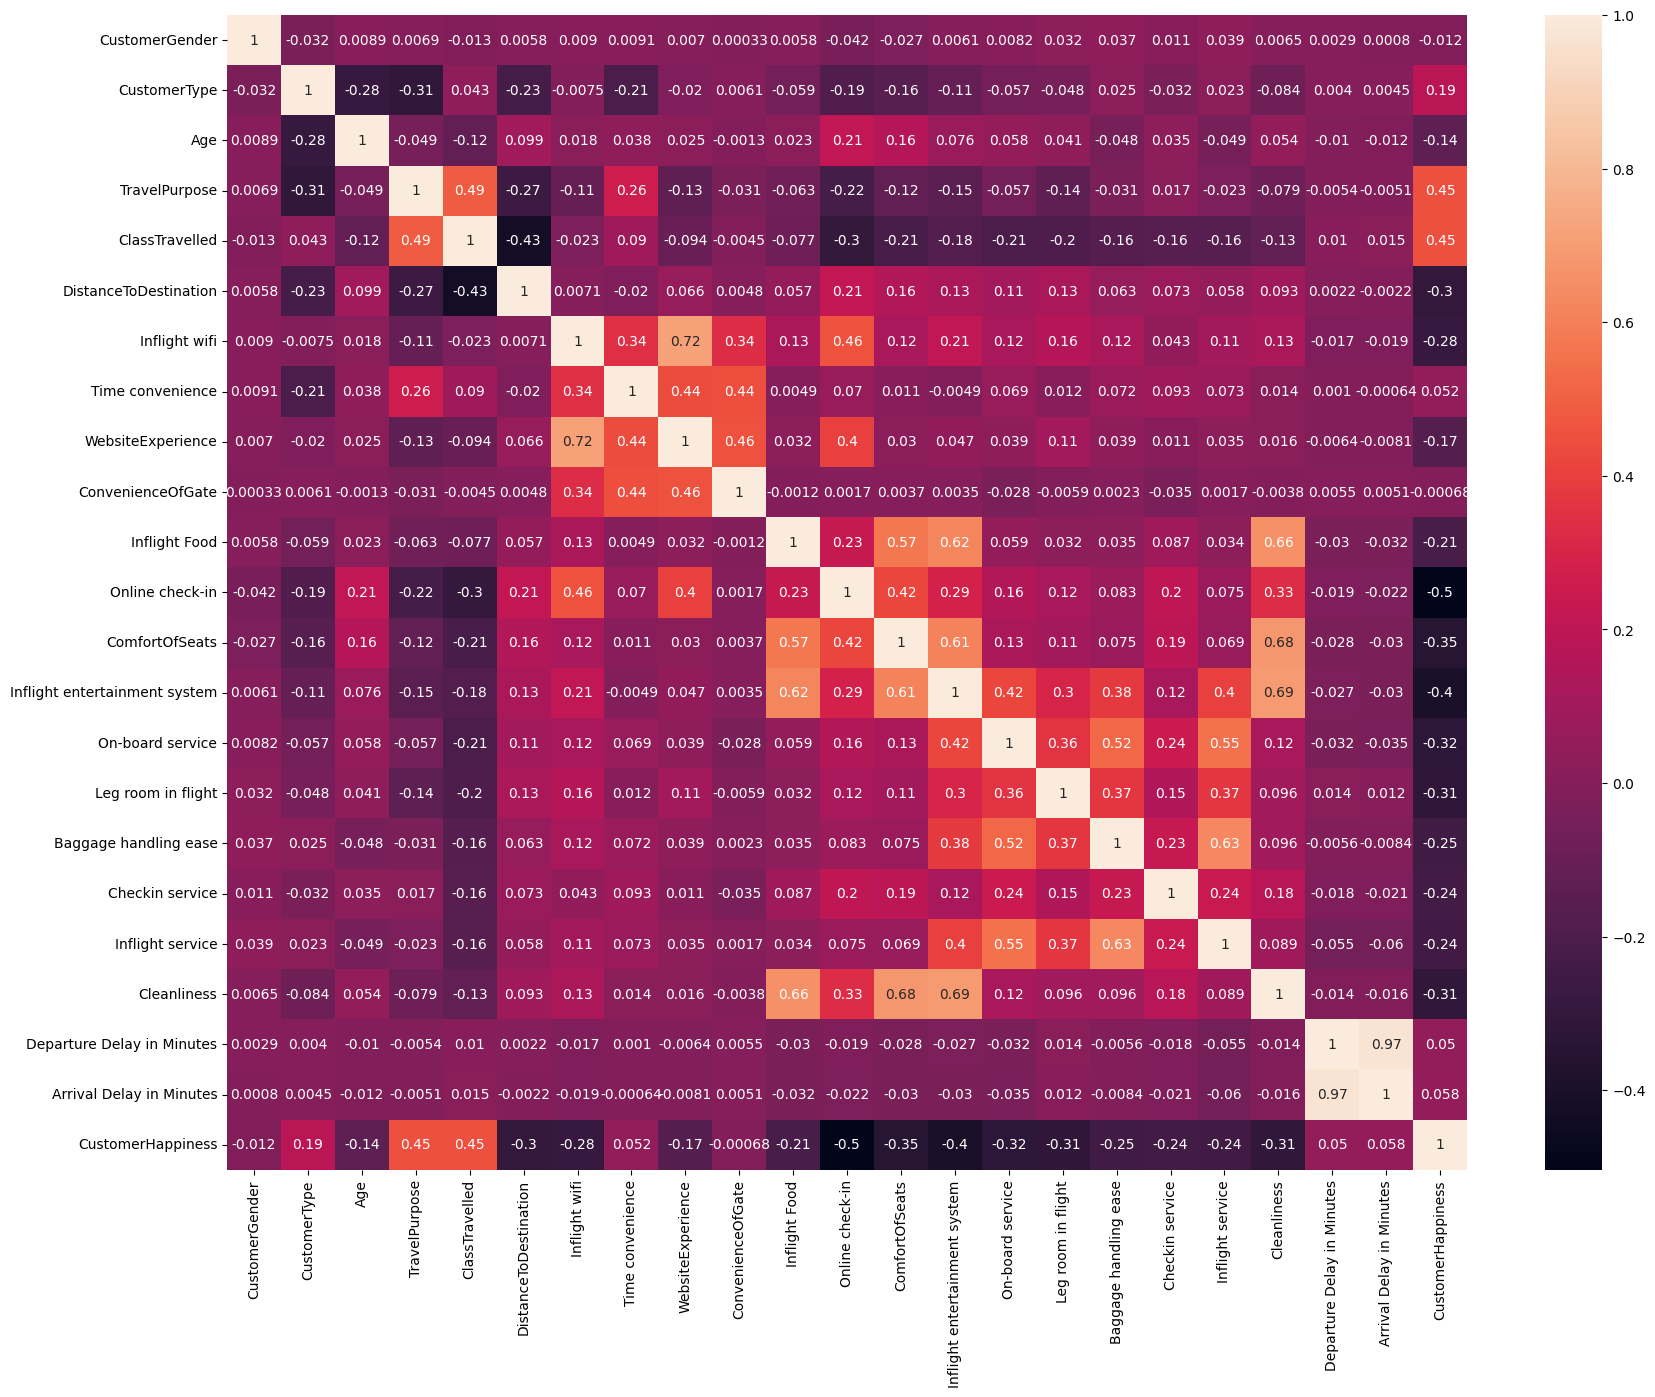

In [52]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(),annot=True)

## Creating new features

In [25]:
# Didnt end up using these features 
def calculate_overall_inflight(row):
    inflight_features = ['Inflight wifi', 'Inflight Food', 'ComfortOfSeats', 
                         'Inflight entertainment system', 'On-board service', 
                         'Leg room in flight', 'Inflight service', 'Cleanliness']
    return row[inflight_features].median()
df['overall_inflight'] = df.apply(calculate_overall_inflight, axis=1)
df.drop(['Inflight wifi', 'Inflight Food', 'ComfortOfSeats','Inflight entertainment system', 'On-board service', 
                         'Leg room in flight', 'Inflight service', 'Cleanliness'],axis=1,inplace=True)
df.head()

,id,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Time convenience,WebsiteExperience,ConvenienceOfGate,Online check-in,Baggage handling ease,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness,overall_inflight
0,70172,Male,Frequent,13,Recreation,PremiumEconomy,460,4,3,1,3,4,4,25,18.0,Unhappy,5.0
1,5047,Male,Occasional,25,Business,Business,235,2,3,3,3,3,1,1,6.0,Unhappy,1.0
2,110028,Female,Frequent,26,Business,Business,1142,2,2,2,5,4,4,0,0.0,Happy,4.5
3,24026,Female,Frequent,25,Business,Business,562,5,5,5,2,3,1,11,9.0,Unhappy,2.0
4,119299,Male,Frequent,61,Business,Business,214,3,3,3,5,4,3,0,0.0,Happy,3.0


In [26]:
# Didnt end up using these features 
def calculate_overall_outflight(row):
    outflight_features = ['Time convenience', 'WebsiteExperience', 'ConvenienceOfGate',
                            'Online check-in','Baggage handling ease', 'Checkin service',]
    return row[outflight_features].median()
df['overall_outflight'] = df.apply(calculate_overall_outflight, axis=1)
df.drop(['Time convenience', 'WebsiteExperience', 'ConvenienceOfGate',
                            'Online check-in','Baggage handling ease', 'Checkin service',],axis=1,inplace=True)
df.head()

,id,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness,overall_inflight,overall_outflight
0,70172,Male,Frequent,13,Recreation,PremiumEconomy,460,25,18.0,Unhappy,5.0,3.5
1,5047,Male,Occasional,25,Business,Business,235,1,6.0,Unhappy,1.0,3.0
2,110028,Female,Frequent,26,Business,Business,1142,0,0.0,Happy,4.5,3.0
3,24026,Female,Frequent,25,Business,Business,562,11,9.0,Unhappy,2.0,4.0
4,119299,Male,Frequent,61,Business,Business,214,0,0.0,Happy,3.0,3.0


In [9]:
#model ready test
df.to_csv('model_ready_test1(nofeat).csv',index=False)

In [29]:
# model Ready train
df.to_csv('model_ready_train1(nofeat).csv',index=False)

## Label Encoding

In [114]:
df=pd.read_csv('model_ready_train1(nofeat).csv')

In [313]:
#testing
df=pd.read_csv('model_ready_test1(nofeat).csv')

In [10]:
df.head()

,CustomerGender,CustomerType,Age,TravelPurpose,ClassTravelled,DistanceToDestination,Inflight wifi,Time convenience,WebsiteExperience,ConvenienceOfGate,...,Inflight entertainment system,On-board service,Leg room in flight,Baggage handling ease,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,CustomerHappiness
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,1
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,1
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,1
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,0


In [ ]:
df.drop('id',axis=1,inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
df['TravelPurpose']=le.fit_transform(df['TravelPurpose'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Business': 0, 'Recreation': 1}


In [35]:
df['CustomerGender']=le.fit_transform(df['CustomerGender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1}


In [36]:
df['ClassTravelled']=le.fit_transform(df['ClassTravelled'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Business': 0, 'Economy': 1, 'PremiumEconomy': 2}


In [37]:
df['CustomerType']=le.fit_transform(df['CustomerType'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Frequent': 0, 'Occasional': 1}


In [38]:
df['CustomerHappiness']=le.fit_transform(df['CustomerHappiness'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Happy': 0, 'Unhappy': 1}


# Model

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [116]:
X=df.drop('CustomerHappiness',axis=1)
y=df['CustomerHappiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM

In [117]:
#lgbm=LGBMClassifier(n_estimators=5000,learning_rate=0.01,boosting_type='dart',force_col_wise=True,num_threads=3,num_leaves=45,max_depth=100)
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [118]:
pred=lgbm.predict(X_test)
print(classification_report(y_test,pred))
print(f1_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      9068
           1       0.93      0.96      0.95     11713

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781

0.945151565901859


## RF

In [119]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
pred=rf.predict(X_test)

In [121]:
print(classification_report(y_test,pred))
print(f1_score(y_test,pred))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9068
           1       0.93      0.96      0.95     11713

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781

0.9452669546617456


## Test submission

In [462]:
#run for testing before this.
arr=xgb.predict(df)

In [463]:
arr

array([0, 0, 1, ..., 1, 0, 1])

In [466]:
df_test=pd.read_csv('sample_submission.csv')
predictions= np.where(arr == 1, "Unhappy", "Happy")
predictions
output = pd.DataFrame({'id': df_test.id,
                       'CustomerHappiness': predictions})
output.to_csv('submitxgb.csv', index = False)

In [1]:
print("Hello")

Hello


In [469]:
output['CustomerHappiness'].value_counts()

CustomerHappiness
Unhappy    14900
Happy      11076
Name: count, dtype: int64